In [1]:
from eis.vcf_dataloader import SplicingVCFDataloader
from eis import Eis, predict_all_table

from eis.utils import max_varEff

Using TensorFlow backend.


In [2]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'
gtfIntervalTree = '../tests/data/test.pkl' # pickle exon interval Tree

In [3]:
dl = SplicingVCFDataloader(gtfIntervalTree, 
                          fasta,
                          vcf,
                          out_file=gtfIntervalTree,
                          split_seq=False, overhang=(50,10))

In [4]:
next(dl)

{'inputs': {'seq': 'TCCAGGAGAATGAATTGACACTAATCTCTGCTTGTGTTCTCTGTCTCCAGCAATTGGGCAGATGTGTGAGGCACCTGTGGTGACCCGAGAGTGGGTGTTGGACAGTGTAGCACTCTACCAGTGCCAGGAGCTGGACACCTACCTGATACCCCAGATCCCCCACAGCCACTACTGACTGCAGCCAGCCACAGGTACAGAGCCACAGGACCCCAAGAATGAGCTTACAAAGTGGCCTTTCCAGGCCCTGGGAGCTCCTCTCACTCTTCAGTCCTTCTACTGTCCTGGCTACTAAATATTTTATGTACATCAGCCTGAAAAGGACTTCTGGCTATGCAAGGGTCCCTTAAAGATTTTCTGCTTGAAGTCTCCCTTGGAAATCTGCCATGAGCACAAAATTATGGTAATTTTTCACCTGAGAAGATTTTAAAACCATTTAAACGCCACCAATTGAGCAAGATGCTGATTCATTATTTATCAGCCCTATTCTTTCTATTCAGGCTGTTGTTGGCTTAGGGCTGGAAGCACAGAGTGGCTTGGCCTCAAGAGAATAGCTGGTTTCCCTAAGTTTACTTCTCTAAAACCCTGTGTTCACAAAGGCAGAGAGTCAGACCCTTCAATGGAAGGAGAGTGCTTGGGATCGATTATGTGACTTAAAGTCAGAATAGTCCTTGGGCAGTTCTCAAATGTTGGAGTGGAACATTGGGGAGGAAATTCTGAGGCAGGTATTAGAAATGAAAAGGAAACTTGAAACCTGGGCATGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGCAGATCACTGGAGGTCAGGAGTTCGAAACCAGCCTGGCCAACATGGTGAAACCCCATCTCTACTAAAAATACAGAAATTAGCCGGTCATGGTGGTGGACACCTGTAATCCCAGCTACTCAGGTGGCTAAGGCAGGAGAATCACTTCAGCCCGGGAGGTGGAGGTTGCAGTGAGCC

In [5]:
model = Eis(
    exon_cut_l=0,
    exon_cut_r=0,
    acceptor_intron_cut=6,
    donor_intron_cut=6,
    acceptor_intron_len=50,
    acceptor_exon_len=3,
    donor_exon_len=5,
    donor_intron_len=13)

/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
predictions = predict_all_table(model, dl, batch_size=1024, split_seq=False, assembly=False)

0it [00:00, ?it/s]/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:138: UserWarning: None GT donor
  warnings.warn("None GT donor", UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:140: UserWarning: None AG donor
  warnings.warn("None AG donor", UserWarning)
2it [00:20, 10.15s/it]


In [7]:
predictions.head(10)

,ID,exons,EIS_ref_acceptorIntron,EIS_ref_acceptor,EIS_ref_exon,EIS_ref_donor,EIS_ref_donorIntron,EIS_alt_acceptorIntron,EIS_alt_acceptor,EIS_alt_exon,EIS_alt_donor,EIS_alt_donorIntron
0,17:41197805:ACATCTGCC:['A'],17_41196313_41197819:-,-1.928166,5.068929,-4.190762,-4.111602,1.979443,-1.928166,5.068929,-4.189984,-4.111602,1.979443
1,17:41197805:ACATCTGCC:['A'],17_41196312_41197819:-,-1.928166,5.068929,-4.191132,-3.197543,0.105083,-1.928166,5.068929,-4.190357,-3.197543,0.105083
2,17:41197805:ACATCTGCC:['A'],17_41197580_41197819:-,-1.928166,5.068929,-3.507481,-4.358478,1.739020,-1.928166,5.068929,-3.478895,-4.358478,1.739020
3,17:41197805:ACATCTGCC:['A'],17_41197646_41197819:-,-1.928166,5.068929,-3.694287,-4.113739,-0.919510,-1.928166,5.068929,-3.663338,-4.113739,-0.919510
4,17:41197805:ACATCTGCC:['A'],17_41197695_41197819:-,-1.928166,5.068929,-3.961106,-2.946022,0.872523,-1.928166,5.068929,-3.935440,-2.946022,0.872523
5,17:41197809:CTGCCCAAT:['C'],17_41196822_41197819:-,-1.928166,5.068929,-3.869307,-2.495066,0.788881,-1.928166,4.766502,-3.850556,-2.495066,0.788881
6,17:41197809:CTGCCCAAT:['C'],17_41196313_41197819:-,-1.928166,5.068929,-4.190762,-4.111602,1.979443,-1.928166,4.766502,-4.180094,-4.111602,1.979443
7,17:41197809:CTGCCCAAT:['C'],17_41196312_41197819:-,-1.928166,5.068929,-4.191132,-3.197543,0.105083,-1.928166,4.766502,-4.180473,-3.197543,0.105083
8,17:41197809:CTGCCCAAT:['C'],17_41197580_41197819:-,-1.928166,5.068929,-3.507481,-4.358478,1.739020,-1.928166,4.766502,-3.414991,-4.358478,1.739020
9,17:41197809:CTGCCCAAT:['C'],17_41197646_41197819:-,-1.928166,5.068929,-3.694287,-4.113739,-0.919510,-1.928166,4.766502,-3.574026,-4.113739,-0.919510


In [8]:
predictionsMax = max_varEff(predictions)

In [9]:
predictionsMax.head()

,ID,EIS_diff,exons,EIS_ref_acceptorIntron,EIS_ref_acceptor,EIS_ref_exon,EIS_ref_donor,EIS_ref_donorIntron,EIS_alt_acceptorIntron,EIS_alt_acceptor,EIS_alt_exon,EIS_alt_donor,EIS_alt_donorIntron
0,17:41197805:ACATCTGCC:['A'],0.030949,17_41197646_41197819:-,-1.928166,5.068929,-3.694287,-4.113739,-0.919510,-1.928166,5.068929,-3.663338,-4.113739,-0.919510
1,17:41197809:CTGCCCAAT:['C'],-0.291768,17_41196312_41197819:-,-1.928166,5.068929,-4.191132,-3.197543,0.105083,-1.928166,4.766502,-4.180473,-3.197543,0.105083
2,17:41197810:T:['A'],0.063456,17_41197695_41197819:-,-1.928166,5.068929,-3.961106,-2.946022,0.872523,-1.928166,5.068929,-3.897650,-2.946022,0.872523
3,17:41197811:G:['T'],0.209766,17_41197695_41197819:-,-1.928166,5.068929,-3.961106,-2.946022,0.872523,-1.928166,5.068929,-3.751340,-2.946022,0.872523
4,17:41197812:C:['A'],0.031922,17_41197695_41197819:-,-1.928166,5.068929,-3.961106,-2.946022,0.872523,-1.928166,5.068929,-3.929184,-2.946022,0.872523


In [10]:
import matplotlib.pyplot as plt 

In [11]:
%matplotlib inline

(array([  1.,   7.,  19.,  68., 116., 149., 561.,  91.,   7.,   1.]),
 array([-13.48544693, -11.49749448,  -9.50954204,  -7.52158959,
         -5.53363714,  -3.5456847 ,  -1.55773225,   0.4302202 ,
          2.41817265,   4.40612509,   6.39407754]),
 <a list of 10 Patch objects>)

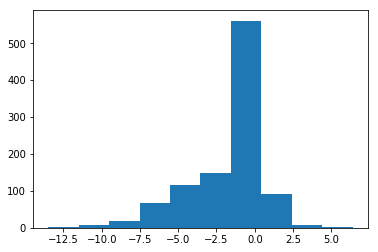

In [12]:
plt.hist(predictionsMax.EIS_diff)

In [13]:
predictionsMax.sort_values(['EIS_diff'])

,ID,EIS_diff,exons,EIS_ref_acceptorIntron,EIS_ref_acceptor,EIS_ref_exon,EIS_ref_donor,EIS_ref_donorIntron,EIS_alt_acceptorIntron,EIS_alt_acceptor,EIS_alt_exon,EIS_alt_donor,EIS_alt_donorIntron
691,17:41245766:CATATTGCTTATACTGCTGCTTATAGGTTCAGCT...,-13.485447,17_41245603_41246877:-,-2.442636,3.028368,-3.911511,-3.401715,0.773910,-3.743621,-8.028995,-5.038611,-3.401715,0.773910
159,17:41203079:CCT:['ATGTTG'],-10.520526,17_41203080_41203134:-,-2.587890,8.001822,-4.647964,6.489661,0.348294,-2.587890,8.001822,-5.302276,-3.376554,0.348294
248,17:41215348:AC:['A'],-10.168094,17_41215350_41215390:-,-2.180541,4.349551,-4.000435,6.303708,1.597480,-2.180541,4.349551,-4.000435,-4.006296,1.739390
511,17:41226345:TACCTAGATCTTGCCTTGGCAAGTAAGATGTTTC...,-10.116076,17_41226348_41226538:-,-2.528111,4.211328,-3.590879,2.278782,1.434947,-2.528111,3.670491,-5.706032,-5.301087,1.554729
146,17:41203074:TCTTACCT:['ATGTTG'],-10.065115,17_41203080_41203134:-,-2.587890,8.001822,-4.647964,6.489661,0.348294,-2.587890,8.001822,-5.622374,-3.442025,1.189275
1282,17:41276033:C:['CCAGATG'],-9.786831,17_41276034_41276132:-,-1.801985,-0.149763,-3.517247,5.413553,0.223911,-1.801985,-0.149763,-3.517247,-4.404877,0.255510
154,17:41203078:AC:['A'],-9.691085,17_41203080_41203134:-,-2.587890,8.001822,-4.647964,6.489661,0.348294,-2.587890,8.001822,-4.647964,-3.478460,0.625331
155,17:41203078:ACCTGTGGGCATGTTGGTGAAGGG:['A'],-9.544625,17_41203080_41203134:-,-2.587890,8.001822,-4.647964,6.489661,0.348294,-2.587890,8.001822,-4.737801,-3.312163,0.695330
104,17:41201134:TTAC:['T'],-9.444828,17_41201138_41201211:-,-3.125177,2.171631,-3.323678,4.544860,1.841769,-3.125177,2.171631,-3.323678,-3.788975,0.730776
949,17:41251814:CTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGA...,-9.315314,17_41251792_41251894:-,-2.662504,1.003448,-3.000969,3.153672,0.670856,-3.570884,-6.714396,-3.690059,3.153672,0.670856
